<a href="https://colab.research.google.com/github/hebertgo/Prueba_Data_Science_Davivienda/blob/master/datos_no_estructurados_02_HebertGomez/Prueba_de_conocimientos_II_DNE_Davivienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from nltk.corpus import words
import numpy as np
import pandas as pd
import joblib
import string
from nltk.corpus import stopwords
import nltk
from time import time
from sklearn.pipeline import Pipeline
import re
from textblob import TextBlob
nltk.download('punkt')

nltk.download('stopwords')

! pip install sentiment-analysis-spanish

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def split_data(file_name):

  # Lectura del archivo

  a= pd.read_csv(file_name)
  file_name=file_name.replace('.csv','')

  # Definir el número de partes para dividir la data
  n_parts = 10

  # Calcular el tamaño de cada parte
  chunk_size = len(a) // n_parts

  # Guardar cada parte en un archivo separado
  for i in range(n_parts):
      start = i * chunk_size
      end = (i + 1) * chunk_size if i != n_parts - 1 else len(a)
      chunk = a.iloc[start:end]
      chunk.to_csv(f'{file_name}{i+1}.csv', index=False)


split_data(file_name='/content/davivienda_tweets.csv')

In [ ]:
df = pd.read_csv('/content/davivienda_tweets.csv',sep=',',low_memory=False)

In [ ]:
for i in df

SyntaxError: expected ':' (<ipython-input-238-3e3495b1744d>, line 1)

In [ ]:

def f_preprocess_df(data):                                    #Define the function to preprocess of Text
    text=str(data)                                            #Convert all text to strings
    text=text.lower()
    text=text.replace('\n',' ')
    text=text.replace('@',' ')                                       #Convert to lowercase characters
    text=re.sub(r'[^a-zA-Z0-9ñóáíéúy\s]','',text)
    text = re.sub(r'/^[^`!#$%^&()_=+\\;:"\/?>.<,-]$/',' ',text)                    #Remove special characters
    text=re.sub(r'(http|https)?://\S+|www\.\S+','',text)      #Remove any links
    text=re.sub(r'[^\w\s]',' ',text)                           #Remove punctuation
    text = re.sub(r'[\d]+',' ',text)                           #Remove digits
    text=re.sub(r'\b\w\b',' ',text)                            #Remove single characters
    text=re.sub(r'\s{2,}',' ',text)                            #Remove multiple spaces
    #                  #Remove special characters
    return text


In [ ]:
df_copy = df.copy()                                       #Copy to a spare Data Frame to keep the main data frame
df_copy["Embedded_text"] = df_copy["Embedded_text"].apply(f_preprocess_df) # Applying the preprocess function to a copy of the data frame
df_copy.drop(columns=['UserScreenName','UserName','Text','Timestamp','Unnamed: 0','Emojis','Comments','Likes','Retweets','Image link','Tweet URL'],inplace=True)
df_copy.head(15)

,Embedded_text
0,la confianza se afectó el indicador de confian...
1,buscamos la accesibilidad mejor atención en tu...
2,señores davivienda no he podido ingresar mi ap...
3,llevo toda una semana sufriendo intento de hur...
4,hemos retrocedido tanto en este país con este ...
5,open data ceo pregúntele la gente de pie si es...
6,conoce los requisitos de la convocatoria de be...
7,mamado de ser adulto tener que trabajar para p...
8,daviplata ayuda por favor llevo más de meses t...
9,cierto recuerdo en se vendieron empresas como ...


In [ ]:

stop=stopwords.words("spanish")

stop.append('si')
print(stop)
stop.remove('no')
def process_text(text):
    Punctuation=''.join([char for char in text if char not in string.punctuation])
    Punctuation=nltk.tokenize.word_tokenize(Punctuation)
    clean_words=[word for word in Punctuation if word.lower() not in stop]
    sentence= ' '.join(clean_words)
    return sentence
df_copy['Embedded_text']=df_copy['Embedded_text'].apply(process_text)


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [ ]:
df_copy['Embedded_text'].head()

0    confianza afectó indicador confianza daviviend...
1    buscamos accesibilidad mejor atención trámites...
2    señores davivienda no podido ingresar app davi...
3    llevo toda semana sufriendo intento hurto medi...
4    retrocedido país gobierno malparidos cajeros d...
Name: Embedded_text, dtype: object

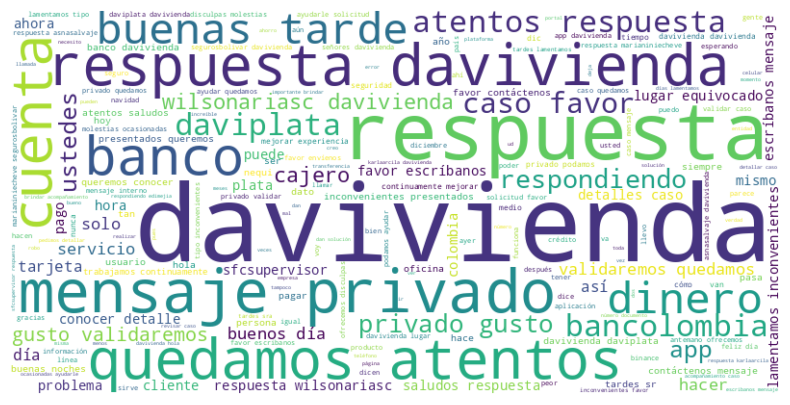

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
#Análisis de Frecuencia de Palabras

vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_copy['Embedded_text'])
frecuencias_palabras = np.asarray(X.sum(axis=0)).flatten()
frecuencia_df = pd.DataFrame({'Palabra': vectorizer.get_feature_names_out(), 'Frecuencia': frecuencias_palabras})
frecuencia_df = frecuencia_df.sort_values(by='Frecuencia', ascending=False)

# Nube de Palabras
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df_copy['Embedded_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [ ]:
from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
df_copy['Embedded_text_blob'] = df_copy['Embedded_text'].apply(lambda x: sentiment.sentiment(x))
df_copy['Embedded_text_blob'].head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


0    0.052709
1    0.895473
2    0.004789
3    0.008526
4    0.053349
Name: Embedded_text_blob, dtype: float64

In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.luhn import LuhnSummarizer

def summarize_text_sumy(text, sentence_count=5):
    # Create a plaintext parser with the input text
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    # Initialize the Luhn summarizer
    summarizer = LuhnSummarizer()
    # Generate the summary
    summary = summarizer(parser.document, sentence_count)
    # Combine the sentences to form the summary text
    summary_text = ' '.join([str(sentence) for sentence in summary])
    return summary_text



In [ ]:
df_copy['Embedded_text_Sumy'] = df_copy['Embedded_text'].apply(lambda x: summarize_text_sumy(x))
df_copy.head()

,Embedded_text,Embedded_text_blob,Embedded_text_Sumy
0,la confianza se afectó el indicador de confian...,4.124182e-04,la confianza se afectó el indicador de confian...
1,buscamos la accesibilidad mejor atención en tu...,2.494752e-02,buscamos la accesibilidad mejor atención en tu...
2,señores davivienda no he podido ingresar mi ap...,1.502988e-04,señores davivienda no he podido ingresar mi ap...
3,llevo toda una semana sufriendo intento de hur...,2.728664e-09,llevo toda una semana sufriendo intento de hur...
4,hemos retrocedido tanto en este país con este ...,3.443575e-04,hemos retrocedido tanto en este país con este ...


Tema 0:
['davivienda', 'respuesta', 'no', 'mensaje', 'privado', 'favor', 'atentos', 'caso', 'quedamos', 'buenas']
Tema 1:
['davivienda', 'respondiendo', 'respuesta', 'banco', 'no', 'marianiniecheve', 'wilsonariasc', 'millones', 'lugar', 'dinero']
Tema 2:
['davivienda', 'respuesta', 'equivocado', 'lugar', 'trabajamos', 'podamos', 'continuamente', 'mejorar', 'concierto', 'experiencia']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


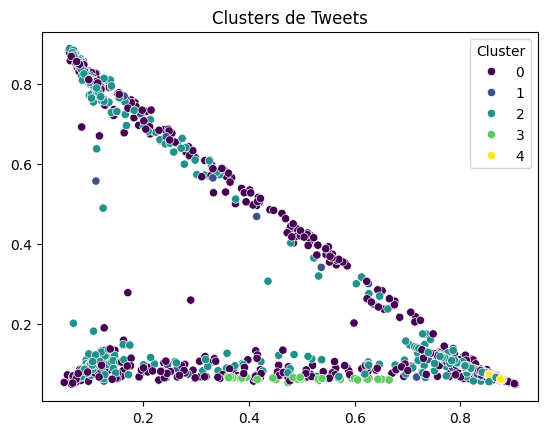

In [ ]:
# Análisis de Temas (Topic Modeling) con LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)
X_topics = lda.fit_transform(X)
tema_palabras = vectorizer.get_feature_names_out()
for idx, tema in enumerate(lda.components_):
    print(f"Tema {idx}:")
    print([tema_palabras[i] for i in tema.argsort()[:-10 - 1:-1]])

# Clustering con K-means
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualización de Clusters
sns.scatterplot(x=X_topics[:, 0], y=X_topics[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Clusters de Tweets')
plt.show()

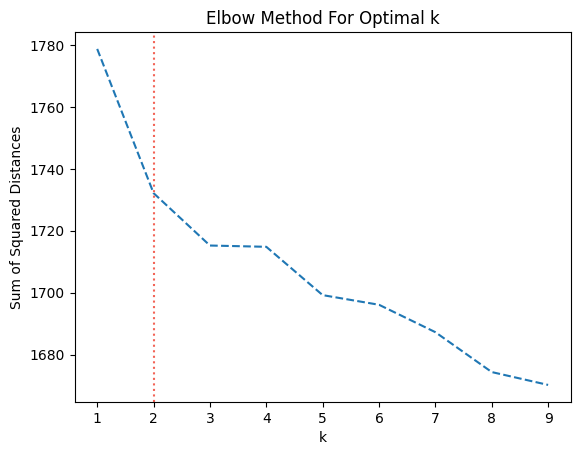

In [ ]:
#ELBOY METHOD
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_copy['Embedded_text_Sumy'])
# Generate data
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(init="k-means++", n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

ax = sns.lineplot(x=K, y=Sum_of_squared_distances)
ax.lines[0].set_linestyle("--")

# Add a vertical line to show the optimum number of clusters
plt.axvline(2, color='#F26457', linestyle=':')

plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
df.drop('clusters', axis=1, inplace=True)
k = 5
# Vectorize the text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_copy['Embedded_text_Sumy'])
# Fit our Model
model = KMeans(init="k-means++", n_clusters=k, max_iter=25, n_init=1)
model.fit(X)
#You can save the cluster assignments as a new column in our data frame with the cluster numbers for future reference.

 # Get the cluster labels
clust_labels = model.predict(X)
cent = model.cluster_centers_


kmeans_labels = pd.DataFrame(clust_labels)
df.insert((df.shape[1]),'clusters',kmeans_labels)
#And finally, let's build a quick data frame that shows the top 15 words from each of the two clusters and see what we get.

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

results_dict = {}

for i in range(k):
    terms_list = []

    for ind in order_centroids[i, :15]:
        terms_list.append(terms[ind])

    results_dict[f'Cluster {i}'] = terms_list

df_clusters = pd.DataFrame.from_dict(results_dict)
df_clusters

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,respuesta,no,quedamos,wilsonariasc,davivienda
1,davivienda,davivienda,atentos,banco,respondiendo
2,lugar,daviplata,privado,davivienda,cuenta
3,equivocado,app,mensaje,respuesta,no
4,no,solución,caso,no,bancolombia
5,asnasalvaje,respuesta,favor,deshacen,hacer
6,mensaje,dinero,buenas,funcionarios,navidad
7,gracias,página,tardes,nathygat,hace
8,interno,pasa,lamentamos,denuncia,dinero
9,segurosbolivar,problema,gusto,así,respuesta


In [ ]:
df

In [ ]:
!pip install sumy

In [ ]:
categories = {
    "atencion al cliente": ["respuesta", "linea", "problema", "caso", "servicio", "solicitud", "ayuda", "atencion","hurto"],
    "soporte": ["app", "web", "acceso", "ingresar"],
    "marketing": ["comprar", "crédito", "cuenta", "beneficios"],
    "productos": ["daviplata", "corredores", "segurosbolivar", "cajero"]
}

['atencion al cliente', 'soporte', 'marketing', 'productos']
['respuesta', 'linea', 'problema', 'caso', 'servicio', 'solicitud', 'ayuda', 'atencion']
respuesta
linea
problema
caso
servicio
solicitud
ayuda
atencion
['app', 'web', 'acceso', 'ingresar']
app
web
acceso
ingresar
['comprar', 'crédito', 'cuenta', 'beneficios']
comprar
crédito
cuenta
beneficios
['daviplata', 'corredores', 'segurosbolivar', 'cajero']
daviplata
corredores
segurosbolivar
cajero
{'atencion al cliente': 4, 'soporte': 56, 'marketing': 6, 'productos': 134}


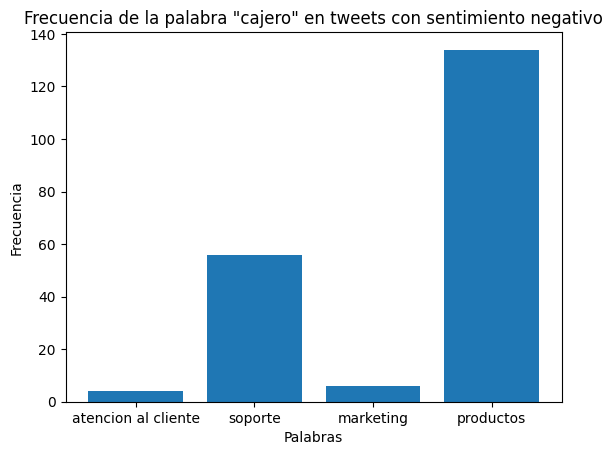

In [ ]:
# prompt: crea una grafica que muestre la cantidad columnas que tengan la palabra cajero cuando la columna Embedded_text blob es menor a 0.3

import pandas as pd

df = pd.read_csv('/content/davivienda_tweets.csv')

# Filter the DataFrame to only include rows where the 'Embedded_text_blob' column is less than 0.3
df_filtered = df_copy[df_copy['Embedded_text_blob'] < 0.5]

# Count the number of rows in the filtered DataFrame that contain the word "cajero" in the 'Embedded_text' column
keywords = list(categories.keys())
print(keywords)
dic2={}
for i in keywords:
  count=0
  print(categories[i])
  for j in categories[i]:
    print(j)
    total = df_filtered['Embedded_text'].str.contains(j).sum()
    count=total+total
  dic2[i]=count
print(dic2)


# Create a bar chart to display the count
plt.bar(dic2.keys(),dic2.values())
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de la palabra "cajero" en tweets con sentimiento negativo')
plt.show()


In [ ]:
# prompt: clustering around a word for Embedded_text

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the Embedded_text column
X = vectorizer.fit_transform(df_copy['Embedded_text'])

# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the kmeans object to the vectorized data
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df_copy['Cluster'] = cluster_labels

# Find the words that are most representative of each cluster
for i in range(kmeans.n_clusters):
    cluster_words = []
    for j in kmeans.cluster_centers_[i].argsort()[:-10 - 1:-1]:
        cluster_words.append(vectorizer.get_feature_names_out()[j])
    print(f"Cluster {i}: {cluster_words}")


0    confianza afectó indicador confianza daviviend...
1    buscamos accesibilidad mejor atención trámites...
2    señores davivienda no podido ingresar app davi...
3    llevo toda semana sufriendo intento hurto medi...
4    retrocedido país gobierno malparidos cajeros d...
Name: Embedded_text, dtype: object
['confianza', 'afectó', 'indicador', 'confianza', 'davivienda', 'leve', 'caída', 'noviembre', 'rompiendo', 'tendencia', 'cinco', 'meses', 'mejoras', 'indicador', 'deterioró', 'especialmente', 'última', 'semana', 'mes', 'asociado', 'aumento', 'tasa', 'cambio']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: ['davivienda', 'respuesta', 'banco', 'daviplata', 'respondiendo', 'cuenta', 'wilsonariasc', 'bancolombia', 'lugar', 'navidad']
Cluster 1: ['no', 'davivienda', 'respuesta', 'daviplata', 'dinero', 'cuenta', 'banco', 'solución', 'app', 'hacer']
Cluster 2: ['respuesta', 'mensaje', 'atentos', 'privado', 'quedamos', 'caso', 'favor', 'buenas', 'tardes', 'gusto']


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

def summarize_to_one_word(sentence):
    # Tokenize the sentence
    words = word_tokenize(sentence.lower())

    # Remove punctuation
    words = [word for word in words if word.isalnum()]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]

    # Frequency distribution
    word_counts = Counter(filtered_words)

    # Get the most common word
    if word_counts:
        most_common_word = word_counts.most_common(1)[0][0]
    else:
        most_common_word = ""

    return most_common_word

# Example usage
sentence = "The quick brown fox jumps over the lazy dog."
summary_word = summarize_to_one_word(sentence)
print(f"The summary word is: {summary_word}")

The summary word is: quick


In [ ]:
# prompt: Check if 2 words from df_copy['Embedded_text'] are similar from vectors

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the Embedded_text column
X = vectorizer.fit_transform(df_copy['Embedded_text'])

# Get the word vectors for the two words
word1_vector = vectorizer.transform([df_copy['Embedded_text'][0]])
word2_vector = vectorizer.transform([df_copy['Embedded_text'][1]])

# Calculate the cosine similarity between the two word vectors
similarity = cosine_similarity(word1_vector, word2_vector)[0][0]

# Print the similarity score
print(f"Similarity between {df_copy['Embedded_text'][0]} and {df_copy['Embedded_text'][1]}: {similarity}")


Similarity between confianza and banco: 0.0


In [ ]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize sentences
    sentences = sent_tokenize(text)

    # Tokenize words in each sentence
    word_tokens = [word_tokenize(sentence.lower()) for sentence in sentences]

    # Remove punctuation and stop words
    stop_words = set(stopwords.words('spanish'))
    cleaned_tokens = [[word for word in sentence if word.isalnum() and word not in stop_words]
                      for sentence in word_tokens]

    return cleaned_tokens

def train_word2vec_model(tokens):
    # Train Word2Vec model
    model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=1, workers=4)
    return model

def word_similarity(model, word1, word2):
    # Compute similarity between two words
    if word1 in model.wv and word2 in model.wv:
        return model.wv.similarity(word1, word2)
    else:
        return None

# Example usage



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_copy = df.copy()                                       #Copy to a spare Data Frame to keep the main data frame
df_copy["Embedded_text"] = df_copy["Embedded_text"].apply(f_preprocess_df) # Applying the preprocess function to a copy of the data frame
df_copy.drop(columns=['UserScreenName','UserName','Text','Timestamp','Unnamed: 0','Emojis','Comments','Likes','Retweets','Image link','Tweet URL'],inplace=True)


In [ ]:
text=''
for i in df_copy['Embedded_text']:
  text=text+i
print(text)


# Preprocess the text
tokens = preprocess_text(text)

# Train Word2Vec model
model = train_word2vec_model(tokens)

# Measure similarity between words
word1 = "cuenta"
word2 = "banco"
similarity = word_similarity(model, word1, word2)

la confianza se afectó el indicador de confianza davivienda tuvo una leve caída en noviembre rompiendo una tendencia de cinco meses de mejoras el indicador se deterioró especialmente en la última semana del mes asociado al aumento en la tasa de cambio buscamos la accesibilidad mejor atención en tus trámites bancarios es por ello que encuentras en nuestra plaza los siguientes bancos para tu preferencia banco cuscatlán banco fedecrédito davivienda bancoagrícola banco promericaseñores davivienda no he podido ingresar mi app davivienda ingreso la cédula me dice verifique los datos llevo así varios días llevo toda una semana sufriendo intento de hurto por medios electrónicos mi cuenta de ahorros davivienda sin que se puedan realizar porque no tengo plata no felices lo hicieron con la tc con esta sí pudieron ya que tenía cupo libre qué está pasando davivienda hemos retrocedido tanto en este país con este gobierno que hasta los malparidos cajeros de davivienda dizque solo botan de pesos en bi

In [ ]:
if similarity is not None:
    print(f"The similarity between '{word1}' and '{word2}' is: {similarity}")
else:
    print(f"One or both words not in vocabulary.")

The similarity between 'cuenta' and 'banco' is: 0.8097454309463501


In [ ]:
for i in df_copy['Embedded_text']:
  a=preprocess_text(i)
  b=train_word2vec_model(a)

  word1 = "daviplata"
  word2 = "davivienda"
  c=word_similarity(b,word1,word2)
  if similarity is not None:
    print(f"The similarity between '{word1}' and '{word2}' is: {similarity}")
  else:
    print(f"One or both words not in vocabulary.")
word1 = "daviplata"
word2 = "confianza"
c=word_similarity(b,word1,word2)
if similarity is not None:
    print(f"The similarity between '{word1}' and '{word2}' is: {similarity}")
else:
    print(f"One or both words not in vocabulary.")

In [ ]:
#implementar pca?

In [ ]:
df_copy['Embedded_text'].head()

0    Word2Vec<vocab=21, vector_size=100, alpha=0.025>
1    Word2Vec<vocab=18, vector_size=100, alpha=0.025>
2    Word2Vec<vocab=14, vector_size=100, alpha=0.025>
3    Word2Vec<vocab=21, vector_size=100, alpha=0.025>
4    Word2Vec<vocab=13, vector_size=100, alpha=0.025>
Name: Embedded_text, dtype: object

In [ ]:
e=''

# Train Word2Vec mo

# Measure similarity between words
word1 = "banco"
word2 = "davivienda"
similarity = word_similarity(model, word1, word2)

if similarity is not None:
    print(f"The similarity between '{word1}' and '{word2}' is: {similarity}")
else:
    print(f"One or both words not in vocabulary.")

la confianza se afectó el indicador de confianza davivienda tuvo una leve caída en noviembre rompiendo una tendencia de cinco meses de mejoras el indicador se deterioró especialmente en la última semana del mes asociado al aumento en la tasa de cambio buscamos la accesibilidad mejor atención en tus trámites bancarios es por ello que encuentras en nuestra plaza los siguientes bancos para tu preferencia banco cuscatlán banco fedecrédito davivienda bancoagrícola banco promericaseñores davivienda no he podido ingresar mi app davivienda ingreso la cédula me dice verifique los datos llevo así varios días llevo toda una semana sufriendo intento de hurto por medios electrónicos mi cuenta de ahorros davivienda sin que se puedan realizar porque no tengo plata no felices lo hicieron con la tc con esta sí pudieron ya que tenía cupo libre qué está pasando davivienda hemos retrocedido tanto en este país con este gobierno que hasta los malparidos cajeros de davivienda dizque solo botan de pesos en bi